# Clustering the subsampled 1.3 M cells

The data consists in 20K Neurons, downsampled from *1.3 Million Brain Cells from E18 Mice* and is freely available from 10x Genomics ([here](http://cf.10xgenomics.com/samples/cell-exp/1.3.0/1M_neurons/1M_neurons_neuron20k.h5)).

In [1]:
import numpy as np
import scanpy.api as sc

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=70)  # dots (pixels) per inch determine size of inline figures
sc.logging.print_version_and_date()
sc.logging.print_versions_dependencies_numerics()

Running Scanpy 0.4.2.post1+12.g9ab638a on 2018-02-04 11:14.
Dependencies: numpy==1.13.3 scipy==1.0.0 pandas==0.21.0 scikit-learn==0.19.1 statsmodels==0.8.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
adata = sc.read_10x_h5('./data/1M_neurons_neuron20k.h5')

reading ./data/1M_neurons_neuron20k.h5 (0:00:03.751)


In [3]:
adata

AnnData object with n_obs × n_vars = 20000 × 27998 
    var_keys = ['gene_ids']

Run standard preprocessing steps, see [here](https://scanpy.readthedocs.io/en/latest/api/scanpy.api.pp.recipe_zheng17.html#scanpy.api.pp.recipe_zheng17).

In [4]:
sc.pp.recipe_zheng17(adata)

normalizing by total count per cell
    finished (0:00:01.686): normalized adata.X and added
    'n_counts_all', counts per cell before normalization (adata.obs)
filter highly variable genes by dispersion and mean (0:00:01.651)
normalizing by total count per cell
    finished (0:00:00.051): normalized adata.X and added
    'n_counts', counts per cell before normalization (adata.obs)


In [5]:
sc.tl.tsne(adata)

computing tSNE
    computing 'X_pca' with n_pcs = 50
--> avoid this by setting n_pcs = 0
    using the "MulticoreTSNE" package by Ulyanov (2017)
    finished (0:01:20.690) --> added
    'X_tsne', tSNE coordinates (adata.obs)


In [6]:
sc.tl.louvain(adata)

running Louvain clustering
    using 'X_pca' with n_pcs = 50 for building graph
    computing data graph with n_neighbors = 30 
    computing spectral decomposition ("diffmap") with 15 components
    eigenvalues of transition matrix
    [ 1.            0.9947268367  0.9913532734  0.9910389781  0.9903310537
      0.9899209738  0.9835852981  0.9829938412  0.9787830114  0.9769369364
      0.9754987955  0.9754256606  0.9705161452  0.9680066109  0.9550808668]
    using the "louvain" package of Traag (2017)
    finished (0:00:24.674) --> found 19 clusters and added
    'louvain_groups', the cluster labels (adata.obs, dtype=category)


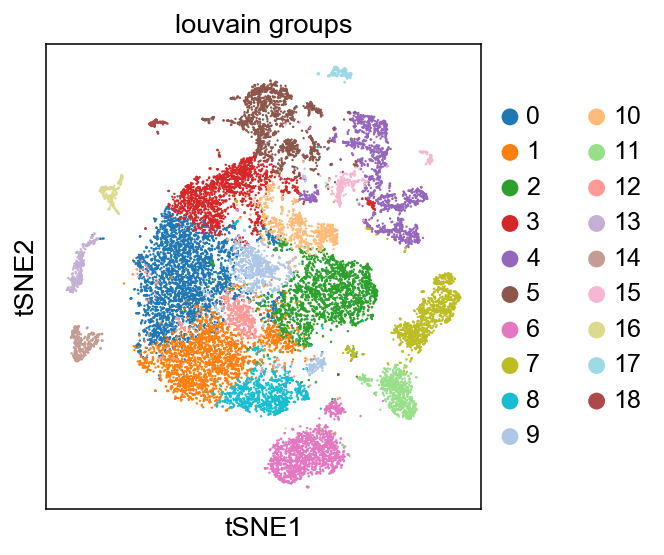

In [7]:
sc.pl.tsne(adata, color='louvain_groups')

In [8]:
adata.write('./write/subsampled.h5ad')